#  Transformée de fourier discrète
La technique usuelle pour déterminer les fréquences caractéristiques ainsi que l’amplitude des harmoniques qui composent un signal, consiste à calculer sa transformée de fourier. 

Dans une approche numérique, cette opération est effectuée sur un ensemble de valeurs échantillonnées.

Le but est d'utiliser ici le module scipy.fft pour calculer les transformées de fourier directe
et inverse.

## 1. Définitions mathématiques

La transformée directe d'un signal __périodique__ s échantillonné en N points 
est définie par :
$$ft[k]=\sum_{n=0}^{N-1}  s[n] \exp(-i \frac{2\pi k}{N}n)$$
où $k \in [0, N-1]$ avec $i^2=-1$.

Sa transformée inverse est :

$$s[n]=\frac{1}{N} \sum_{k=0}^{N-1}  ft[n] \exp(+i \frac{2\pi k}{N}n)$$

Appliquer  ces définitions à un signal non périodique, revient à la périodiser avec une période entière N.


# 2. Exercice
* Calculer la transformée de fourier discrète d'un sinus par:

$$ G(t)=sin(\frac{2\pi}{T} t)$$

On fixera $t \in [0, T[$.
* Entrer son expression dans __kern(t, T)__ en utilisant des expressions numpy.
* Le calcul de la fft se fait grâce à la fonction __fft__ du module scipy.fft, regarder le manuel pour son utilisation.
* Quel est l'intérêt d'utiliser la fonction __fftfreq__ ?

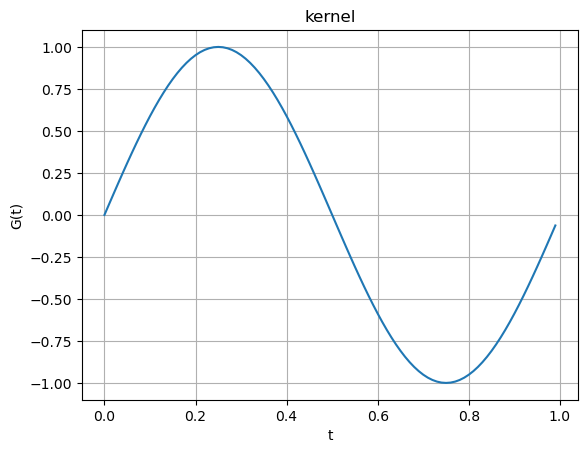

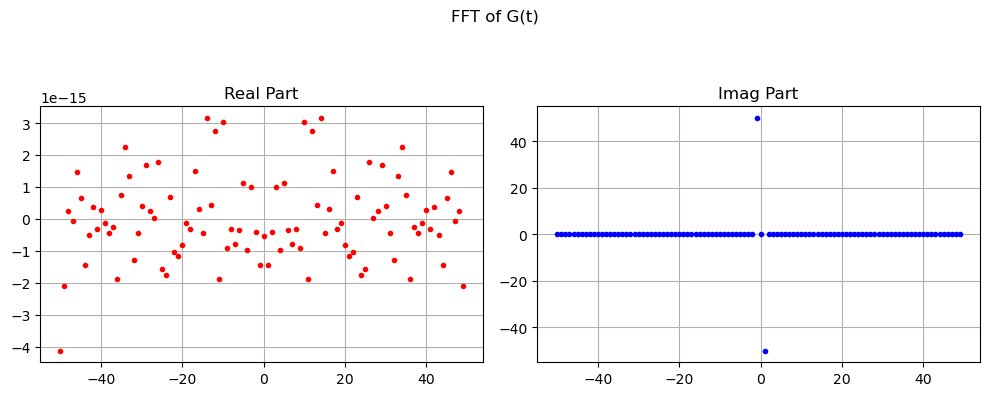

Positive freq : 1.0 fftG: (-1.4351909641968467e-15-50j)
Negative freq : -1.0 fftG: (-1.4351909641968467e-15+50j)


In [1]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def kern(t, T):
    return np.sin(2 * np.pi * t / T)

# Paramètres
T = 1
N = 100  # nombre d'échantillons
t = np.linspace(0, T, N, endpoint=False)  # temps d'échantillonnage

# Signal
G = kern(t, T)

# Affichage du signal
plt.figure()
plt.title("kernel")
plt.xlabel("t")
plt.ylabel("G(t)")
plt.plot(t, G)
plt.grid(True)
plt.show()

# FFT
fftG = fft(G)

#  Given a window length N and a sample spacing d
#  freqs = [0, 1, ...,   N/2-1,     -N/2, ..., -1] / (d*N)   if N is even
freqs = fftfreq(N, d=T/N)  # fréquence en rad/s

# Affichage partie réelle et imaginaire
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('FFT of G(t)')

ax1.set_title('Real Part')
ax1.plot(freqs, fftG.real, 'r.')
ax1.grid(True)

ax2.set_title('Imag Part')
ax2.plot(freqs, fftG.imag, 'b.')
ax2.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

# Vérification de la fréquence dominante
pos_freq_idx = 1
neg_freq_idx = N - pos_freq_idx
print('Positive freq :', freqs[pos_freq_idx], 'fftG:', fftG[pos_freq_idx])
print('Negative freq :', freqs[neg_freq_idx], 'fftG:', fftG[neg_freq_idx])


# 2. Exercice suite
Le but est de calculer la transformée inverse et comparer le signal obtenu avec $G$ défini précédemment.
* Pour ce faire, utiliser __ifft__ du module scipy.fft
* Tracer les parties réelle et imaginaire du signal restauré.

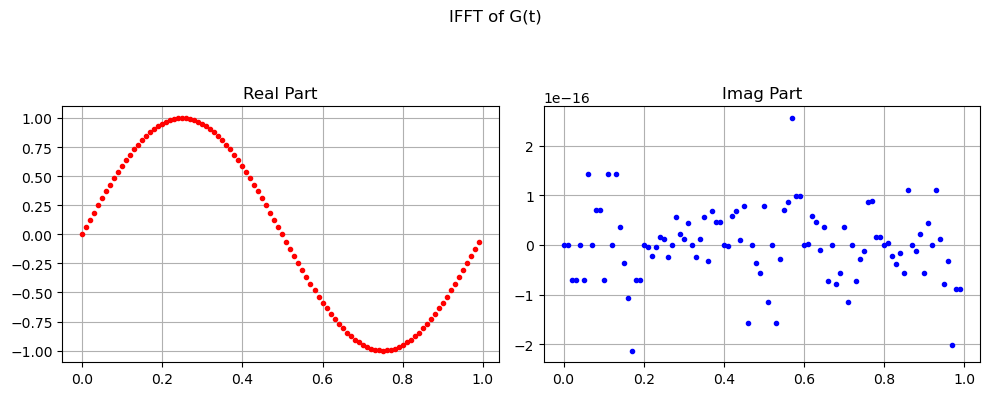

In [2]:
from scipy.fft import ifft

# Transformée inverse de Fourier
G_rec = ifft(fftG)

# Affichage des parties réelle et imaginaire
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("IFFT of G(t)")

ax1.set_title('Real Part')
ax1.plot(t, G_rec.real, 'r.')
ax1.grid(True)

ax2.set_title('Imag Part')
ax2.plot(t, G_rec.imag, 'b.')
ax2.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

### Tracé des graphes avec la bibliothèque plotly
Elle utilise javascript et nécessite un navigateur.
* Licence : MIT

- Vous pouvez utiliser Plotly gratuitement dans vos projets personnels, académiques ou commerciaux.
- Vous pouvez modifier, distribuer et intégrer Plotly dans vos propres applications.
- Vous devez inclure la licence MIT si vous redistribuez du code modifié.

Examiner en particulier les capacités de plotly pour zoomer une partie d'un graphe et récupérer une valeur sur une courbe.

In [3]:
from plotly import subplots
import plotly.offline as py
import plotly.graph_objs as go

import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def kern(t, T):
    return np.sin(2 * np.pi * t / T)

# Paramètres
T = 1
N = 100  # nombre d'échantillons
t = np.linspace(0, T, N, endpoint=False)  # temps d'échantillonnage

# Signal
G = kern(t, T)

# Make plotly work with Jupyter notebook using the plotly.js CDN
py.init_notebook_mode(connected=True)

trace1 = go.Scatter(
    x=t,
    y=G,
    name='G'
)

layout = go.Layout(
    title='Green'
)

py.iplot({
    "data": [trace1],
    "layout": layout,
})

    
# FFT
fftG = fft(G)

#  Given a window length N and a sample spacing d
#  freqs = [0, 1, ...,   N/2-1,     -N/2, ..., -1] / (d*N)   if N is even
freqs = fftfreq(N, d=T/N)  # fréquence en rad/s

trace1 = go.Scatter(
    x=freqs,
    y=fftG.real,
    name='Re(fftG)',
    mode='markers'
)

trace2 = go.Scatter(
    x=freqs,
    y=fftG.imag,
    name='Im(fftG)',
    mode='markers'
)

layout = go.Layout(
    title='Green'
)

py.iplot({
    "data": [trace1],
    "layout": layout,
})

fig = subplots.make_subplots(rows=1, cols=2)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

#fig['layout'].update(height=600, width=600, title='2 subplots')
fig['layout'].update(title='2 subplots')

fig['layout'].update(    
    xaxis1=dict(   
        title='x Axis 1',
        titlefont=dict(
            family='Courier New, monospace',   #police
            size=18,
            color='#7f7f7f'                    #couleur du texte
        )),
    xaxis2=dict(
        title='x Axis 2',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        ))
                    
                    )

py.iplot(fig)



# Exercice
Calculer la transformée de fourier discrète d'une gaussienne définie par:

$$ G(t)=\exp(\frac{-t^2}{2 \sigma^2})$$

On prendra $\sigma=0.1$ et on fixera $t \in [-1, 1[$.

* Pour ce faire, compléter la fonction __gaussian_kern__
* La transformée de Fourier d'une gaussienne est une gaussienne. Observe-t-on cela en appelant fft(G)?
  Tracer les parties réelle et imaginaire de la fft de G.

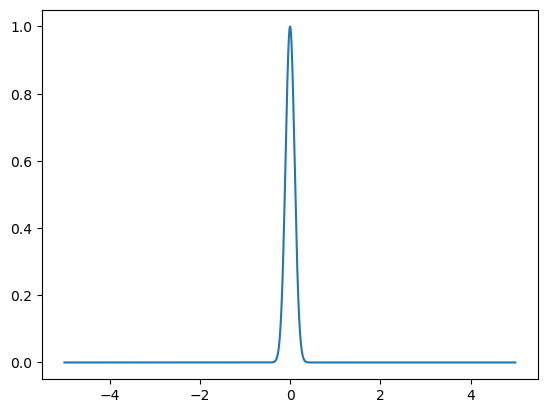

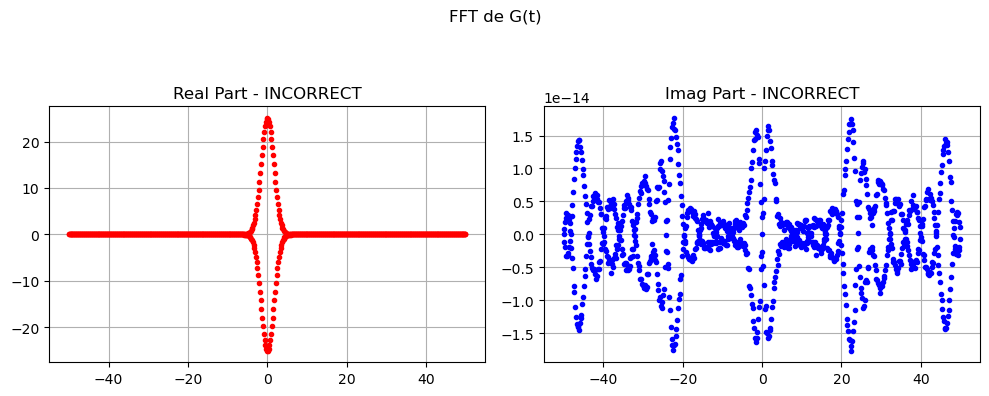

1000


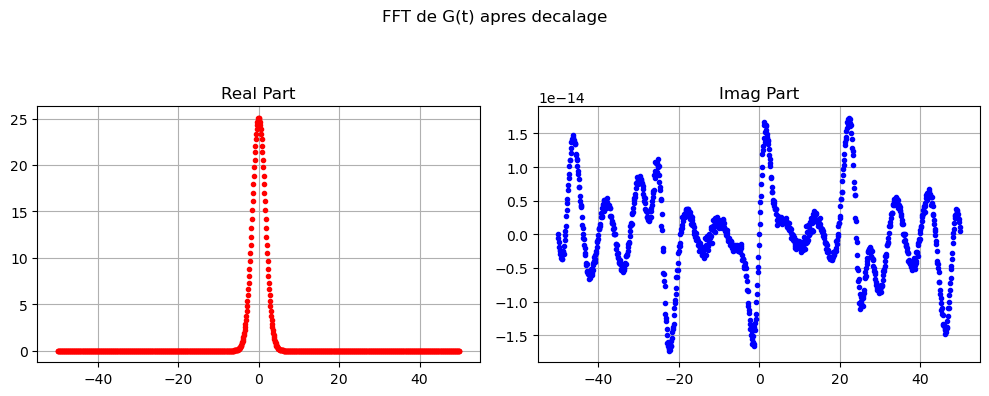

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.filters as filter
from scipy.fft import fft, fftfreq

def gaussian_kern(x, sig):
    kern=np.exp(-x**2/(2*sig**2))
    return kern

T=10
N=1000
t=np.linspace(-T/2, T/2, N, endpoint=False)
G=gaussian_kern(t, 0.1)
plt.figure(1)
plt.plot(t, G)

fftG = fft(G)

#  Given a window length N and a sample spacing d
#  freqs = [0, 1, ...,   N/2-1,     -N/2, ..., -1] / (d*N)   if N is even
freqs = fftfreq(N, d=T/N)  # fréquence en rad/s

# Affichage partie réelle et imaginaire
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('FFT de G(t)')

ax1.set_title('Real Part - INCORRECT')
ax1.plot(freqs, fftG.real, 'r.')
ax1.grid(True)

ax2.set_title('Imag Part - INCORRECT')
ax2.plot(freqs, fftG.imag, 'b.')
ax2.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()



### Calcul correct de la fft

Le document detail.pdf montre qu'il est nécessaire de faire un décalage à gauche avec conditions périodiques des valeurs échantillonnées.

* Pour ce faire on utilise la fonction __np.roll(G, shift=-N//2)__, il est fortement conseillé de prendre N pair, pourquoi?

1000 1000


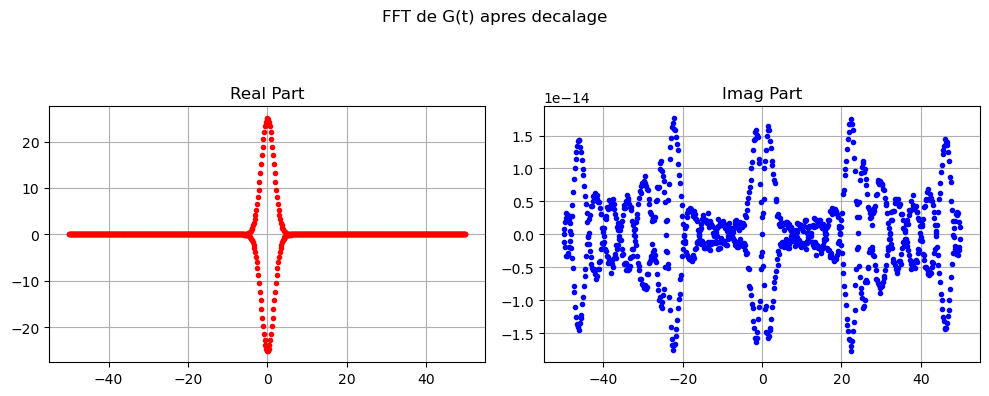

In [5]:
# decalage vers la gauche 
G=np.roll(G, -N//2)
fftG = fft(G)

# Affichage partie réelle et imaginaire
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('FFT de G(t) apres decalage')

ax1.set_title('Real Part')
ax1.plot(freqs, fftG.real, 'r.')
ax1.grid(True)

ax2.set_title('Imag Part')
ax2.plot(freqs, fftG.imag, 'b.')
ax2.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()


# Convolution d'un signal par une gaussienne

Le produit de convolution de deux fonctions réelles ou complexes est défini par:

$$(f*g) (x) = \int_{-\infty}^{+\infty} f(t)\ g(x-t)\ dt$$

La convolution de deux signaux échantillonnés en N points,   est définie par:
$$(f*g)[p]=\sum_{m=0}^{n-1} f_m  . g_{p-m}$$ 

avec $p \in [0, n[$.

Pour que le calcul de convolution soit correct, il est nécessaire de mettre en oeuvre une technique de zero-padding en ajoutant autant de zéro que de valeurs échantillonnées.

## Application du module scipy.fft
* convolution d'un créneau par lui-même. 
* convolution d'une somme de dirac par une gaussienne.

Cette partie montre que les bibliothèques de calcul ne respectent pas forcément les définitions mathématiques.
Il est donc recommandé de développer ses propres routines lors de la phase de développement, pour vérifier les résultats obtenus avec l'aide 
de bibliothèques.

[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


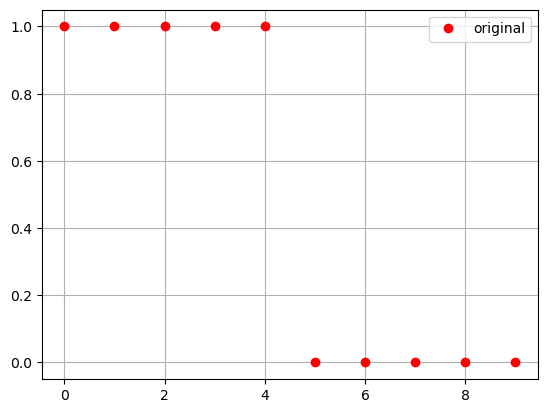

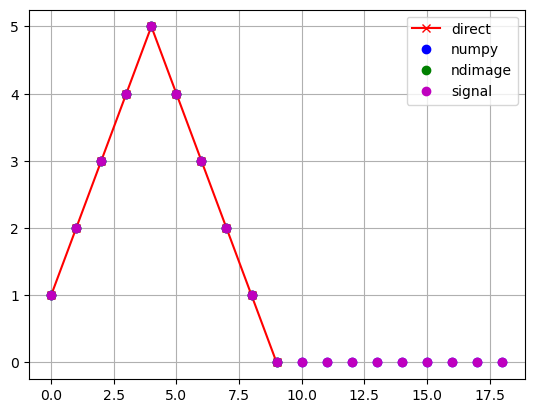

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
from scipy.ndimage import convolve1d

def conv(f, g):
    n=len(f)
    cv=np.zeros(n)
    for p in range(n):
        for m in range(n):
# cv[p] += f[m]*g[(p-m+n)%n]        
            cv[p] += f[m]*g[p-m]         # ATTENTION ASTRUCE NUMPY g[-1] := g[n-1]  
    return cv

# signal initial
sq=np.ones(5)
sq=np.pad(sq, (0, len(sq)), mode='constant') # ajout de zéros (0, len(sq)) = (before, after)
print(sq)

plt.figure(1)
plt.plot(sq,       'ro', label='original')
plt.legend()
plt.grid()

# calcul direct de la convolution
sq2cv=conv(sq, sq)

# calcul vectoriel avec numpy.convolve
# il effectue une convolution discrète au sens mathématique traditionnel 
npcv=np.convolve(sq, sq, mode='full')

# calcul avec scipy.ndimage.convolve1d au sens du traitement d'image, sans retournement du noyau 
# il faut donc retourner le noyau => sq[::-1] 
ndcv=convolve1d(sq, sq[::-1], mode='constant', cval=0) 

sicv = signal.fftconvolve(sq, sq, mode='full');

plt.figure(2)
plt.plot(sq2cv, 'rx-', label = 'direct')
plt.plot(npcv , 'bo', label = 'numpy')
plt.plot(ndcv , 'go', label = 'ndimage')
plt.plot(sicv , 'mo', label = 'signal')

plt.legend()
plt.grid()
plt.show()

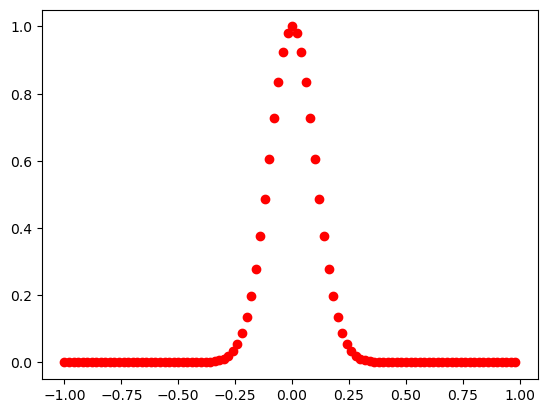

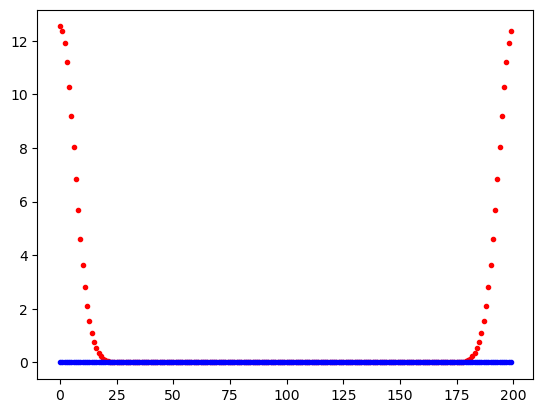

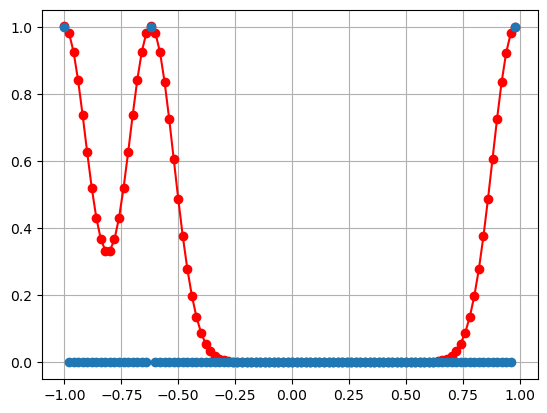

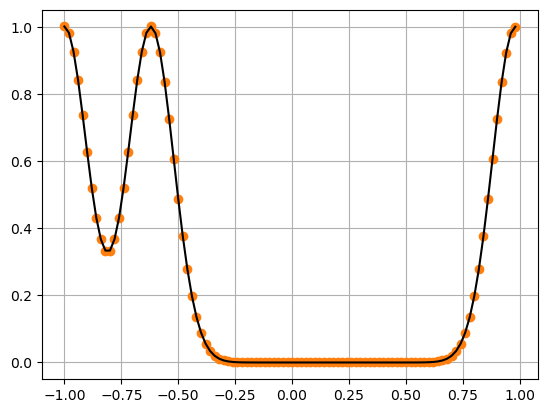

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
import scipy
from scipy.ndimage import convolve1d

def gaussian_kern(x, sig):
    kern=np.exp(-x**2/(2*sig**2))
    return kern

def conv(f, g):
    n=len(f)
    cv=np.zeros(n)
    for p in range(n):
        for m in range(n):
# cv[p] += f[m]*g[(p-m+n)%n]        
            cv[p] += f[m]*g[p-m]         # ATTENTION ASTRUCE NUMPY g[-1] := g[n-1]  
    return cv

def fftconv(q, G):
    assert q.shape == G.shape
    
    lx=q.shape[0]
# zero padding    
    G=np.pad(G, ((0, lx)), mode='constant') # (before, after)
    q=np.pad(q, ((0, lx)), mode='constant') # (before, after)
# decalage vers la gauche    
    G=np.roll(G, -lx//2)
    
    fftq = fft(q)
    fftG = fft(G)
    
    plt.figure(1)
    plt.plot(fftG.real, 'r.')
    plt.plot(fftG.imag, 'b.')
    
    prod_fft  = fftq*fftG
    fftcv= ifft(prod_fft)

    cv=fftcv[0:lx]
    cv=np.real(cv)
    return cv

x=np.linspace(-1, 1, 100, endpoint=False)
G=gaussian_kern(x, 0.1)
q=np.zeros(len(G))

q[0]=1  # placer en 0 pour voir l'effet du zero padding
q[19]=1
q[99]=1  # placer en 99 pour voir l'effet du zero padding


plt.figure()
plt.plot(x, G, 'ro')
plt.show()

cvfft=fftconv(q, G)   
cv=conv(q, G)

# le noyau G est paire
ndcv=scipy.ndimage.convolve1d(q, G, mode='constant')

#cv=np.real(convolve1d(q, G, ) ) # DANGER mode='reflect', cval=0 ==> mode='constant', cval=0
cv=np.real(scipy.ndimage.convolve1d(q, G, mode='constant', cval=0) )

plt.figure()
plt.plot(x, cvfft, 'r-')
plt.plot(x, cv, 'ro')
plt.plot(x, q[0:len(x)], 'o')
plt.grid()

plt.figure()
plt.plot(x, cv[0:len(x)], '.')
plt.plot(x, ndcv[0:len(x)], 'o')

npcvs=np.convolve(q, G[::-1], mode='same')  # G[::-1] renverse l'ordre des éléments du tableau G.
plt.plot(x, npcvs, 'k-')

plt.grid()
plt.show()
